In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model import LinearRegression

In [16]:
class RANSAC1:
    def __init__(self, max_iter=10, threshold=0.5, min_inliers=100):
        self.max_iter = max_iter
        self.threshold = threshold
        self.min_inliers = min_inliers
        self.best_model = None
        self.max_count = 0
        self.mask = None

    def fit(self, X, y, show_plots=True):
        assert X.shape[1] == 1
        assert X.shape[0] > 1.5 * self.min_inliers

        self.best_model = None
        self.max_count = 0
        self.mask = None

        size = X.shape[1] + 1
        data = np.hstack((X.reshape(-1,1), y.reshape(-1,1)))

        for _ in range(self.max_iter):
        
            idx = np.random.choice(len(data), size=size, replace=False)
            samples = data[idx, :]
    
            a = (samples[0,1] - samples[1,1]) / (samples[0,0] - samples[1,0] + sys.float_info.epsilon)
            b = samples[0,1] - a * samples[0,0]
    
            y_pred = a * data[:, 0] + b
            temp_mask = np.square(y_pred - y) < self.threshold
            temp_max_count = sum(temp_mask)
    
            if temp_max_count > self.min_inliers and temp_max_count > self.max_count:
                self.best_model = (a, b)
                self.max_count = temp_max_count
                self.mask = temp_mask
    
            if show_plots:
                line_X = np.array([X.min(), X.max()])
                line_y = a * line_X + b
    
                plt.plot(line_X, line_y, color='blue', label='RANSAC', linewidth=2)
                plt.scatter(X[temp_mask], y[temp_mask], c='green', label='Inliers', marker='.')
                plt.scatter(X[~temp_mask], y[~temp_mask], c='red', label='Outliers', marker='.')
                plt.scatter(samples[:,0], samples[:,1], c='black', label='Samples', marker='o', s=100)
                plt.xlabel('X')
                plt.ylabel('y')
                plt.legend(loc='lower right')
                plt.show()   



In [6]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
 
data = pd.read_csv(r"..\zasoby\housing.data",
                   sep=' +', engine='python', header=None, 
                   names=cols)
 
X = data.loc[:, 'LSTAT'].values.reshape(-1,1)
y = data['MEDV'].values
 
 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

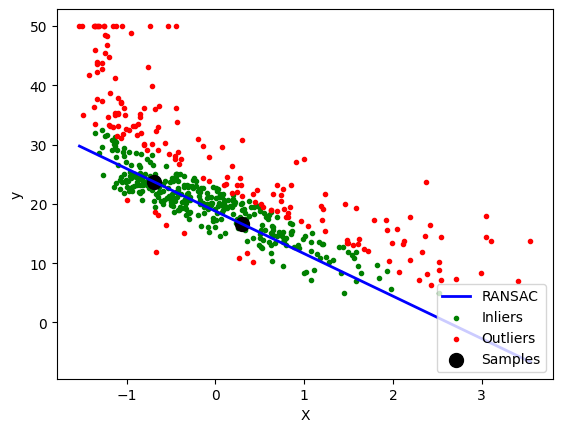

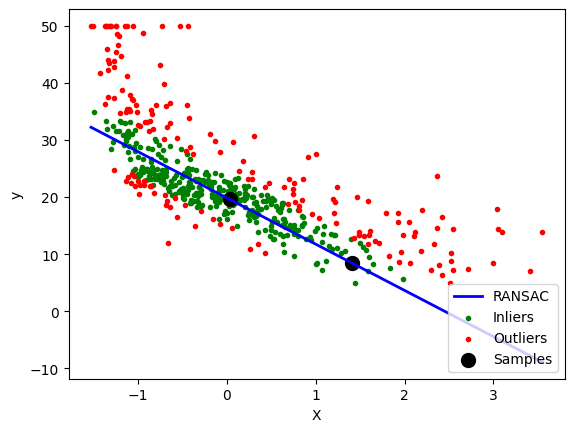

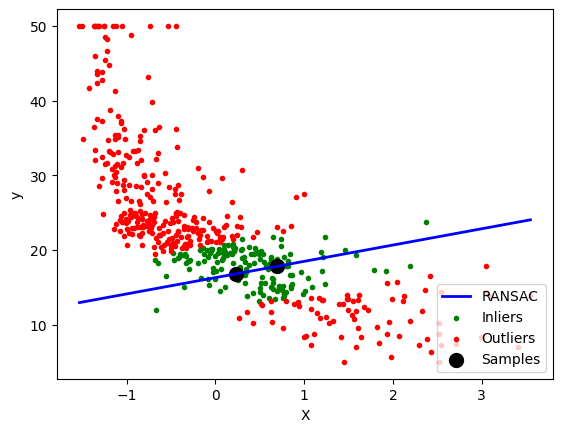

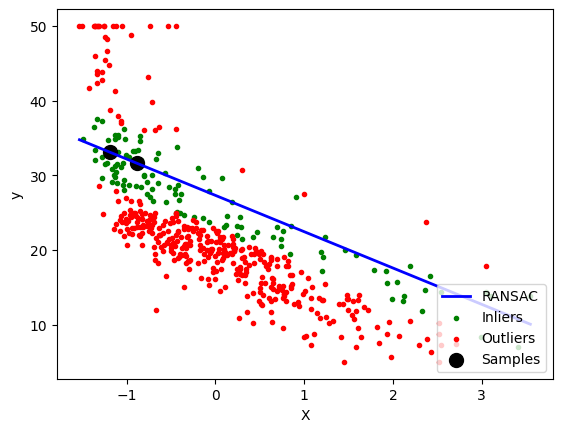

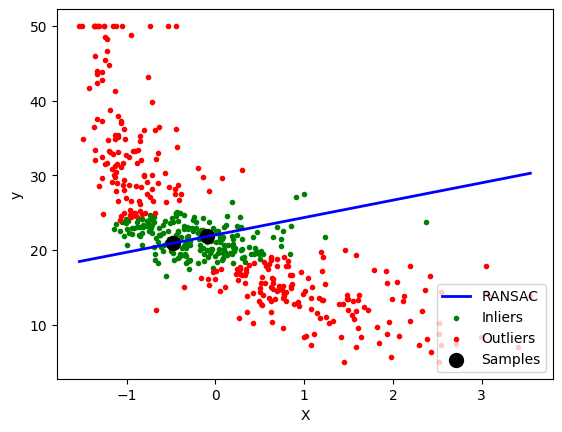

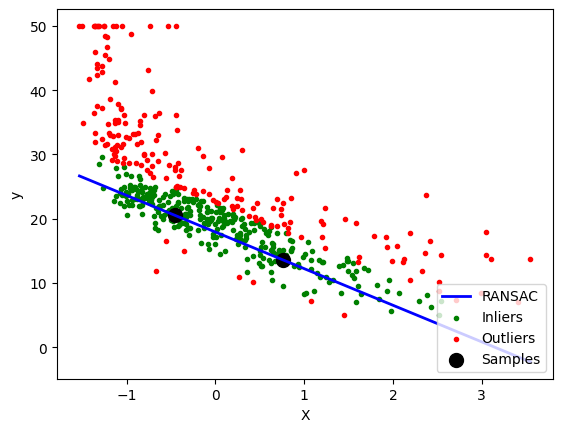

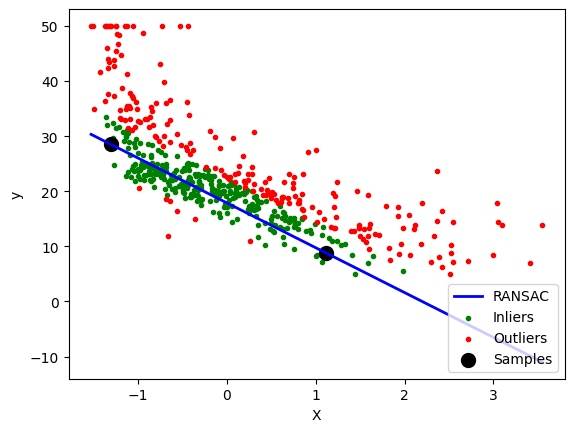

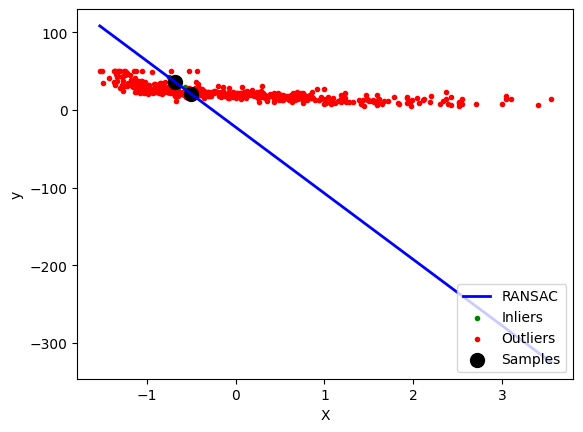

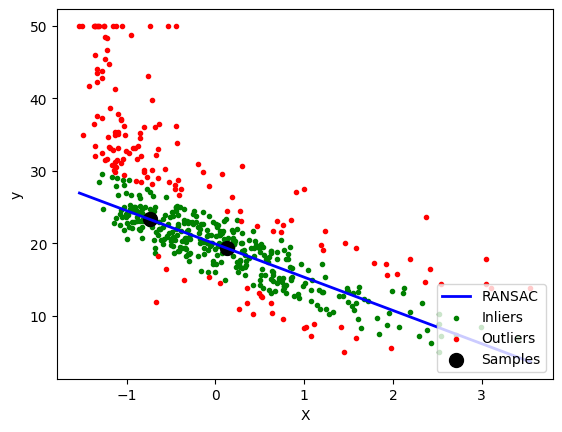

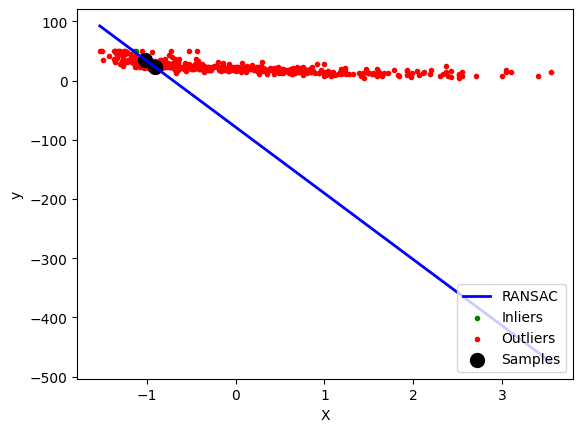

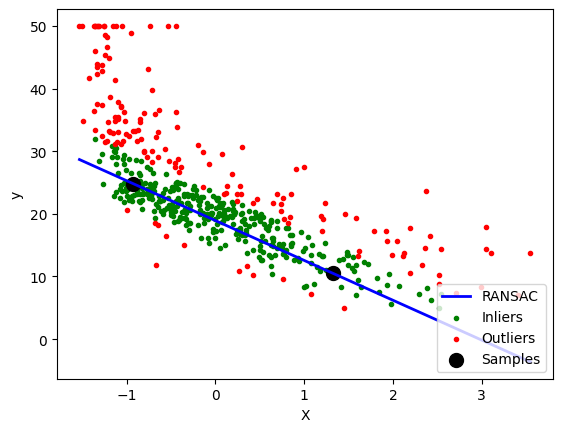

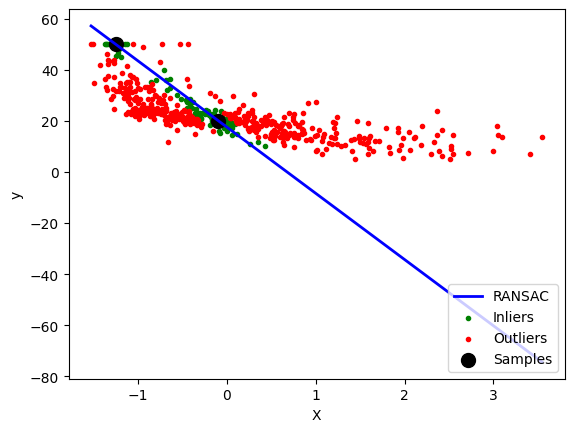

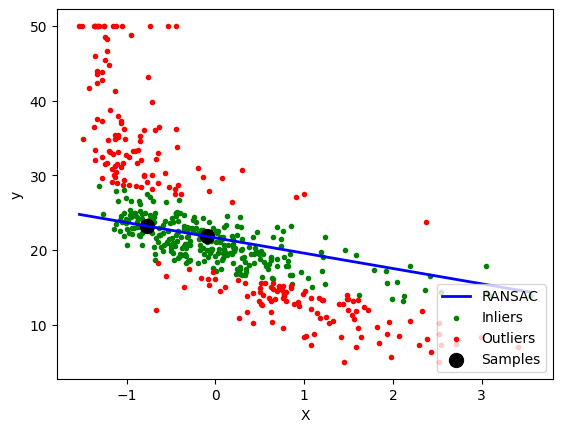

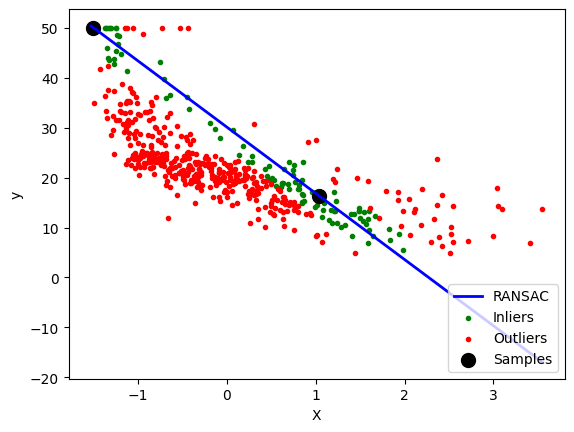

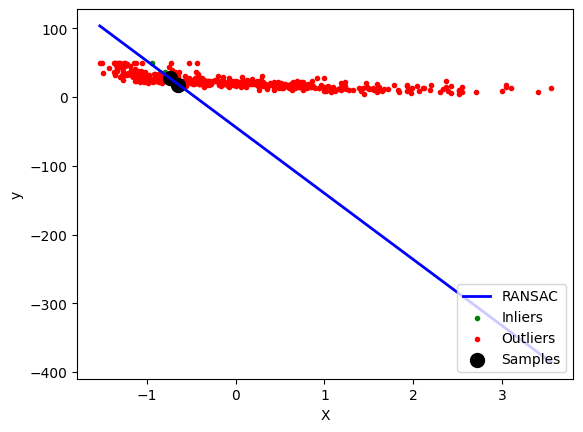

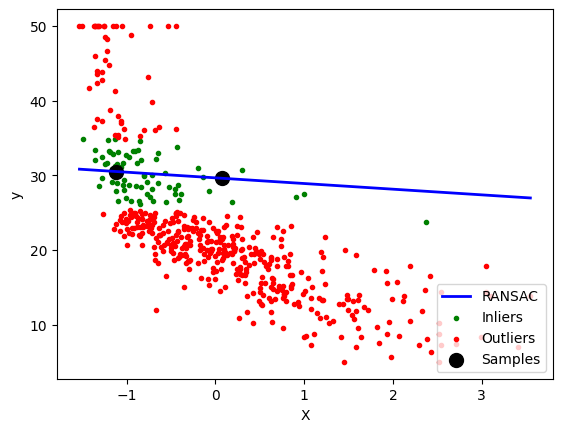

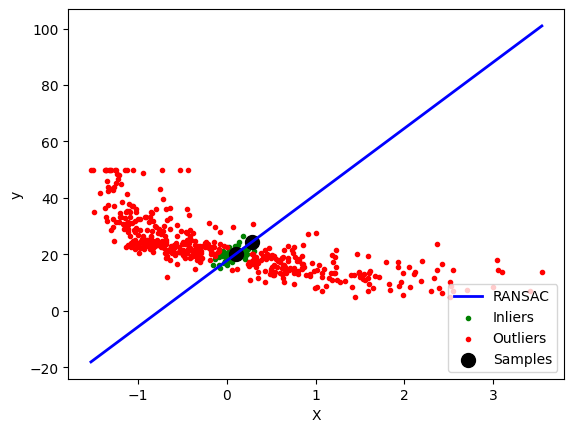

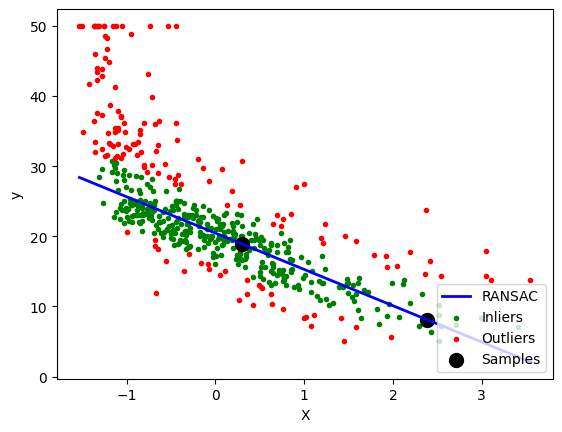

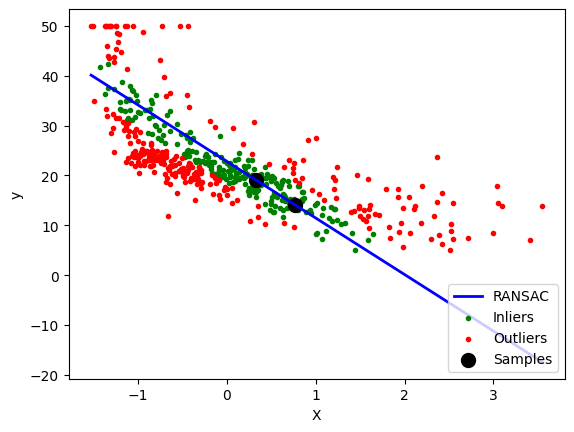

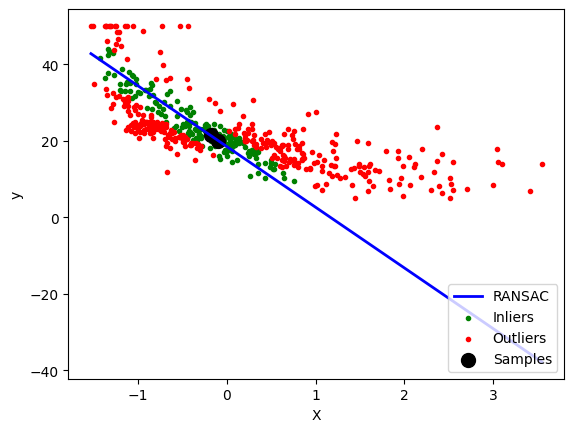

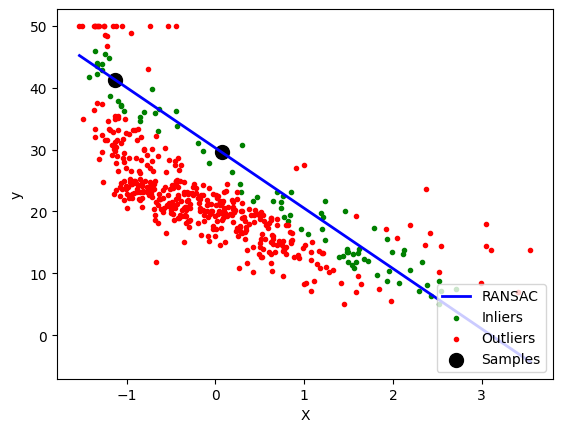

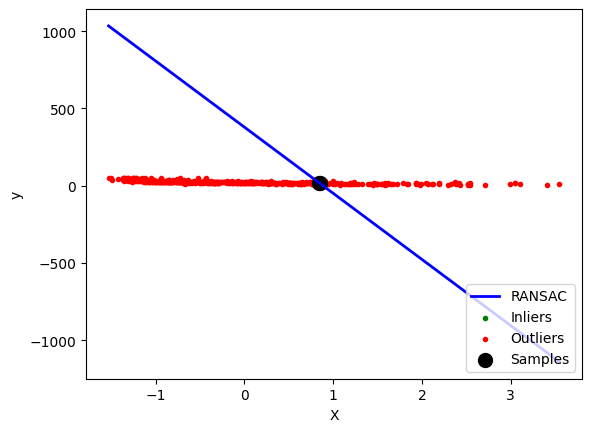

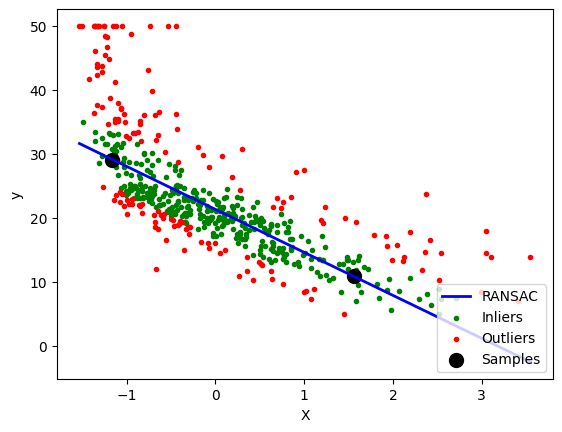

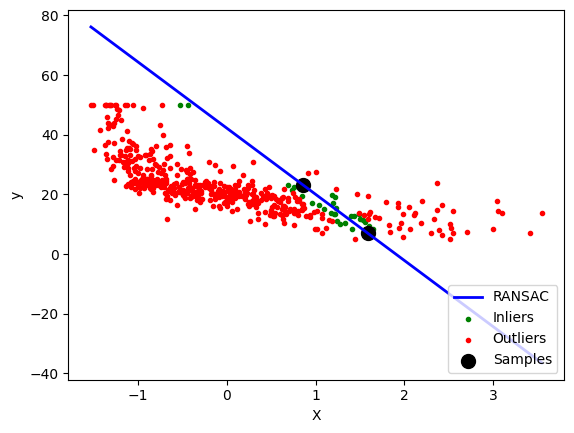

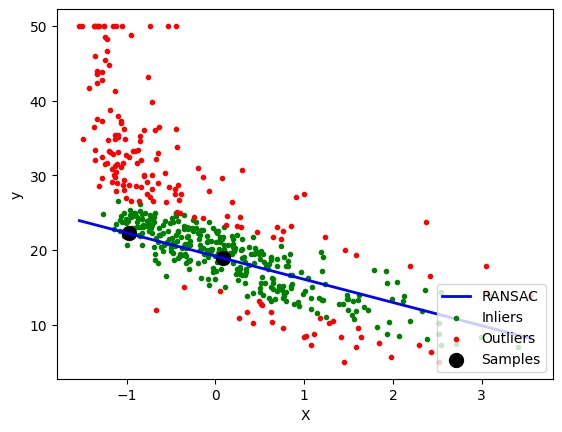

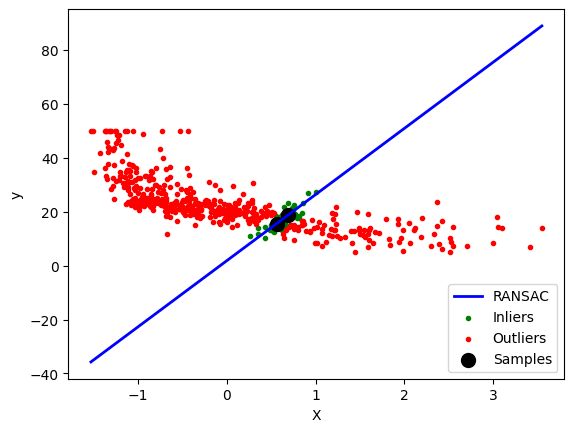

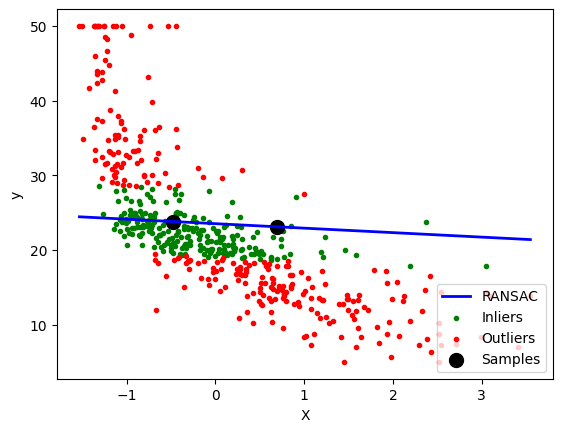

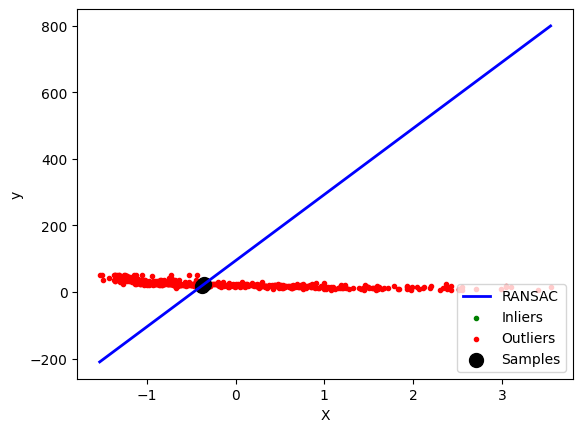

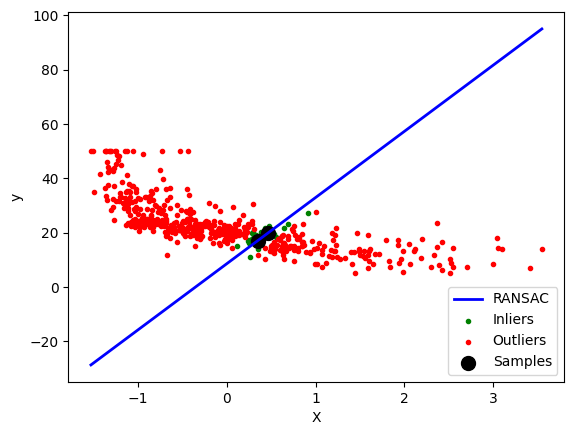

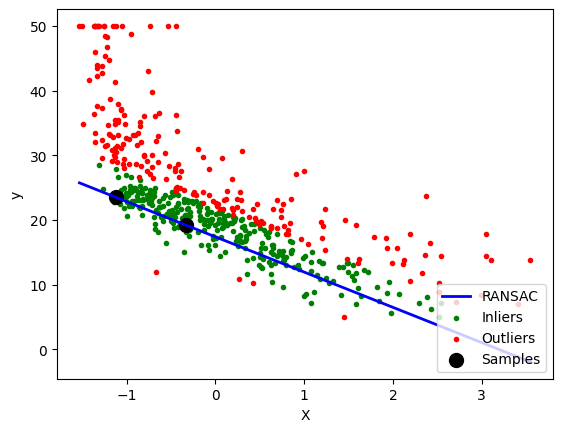

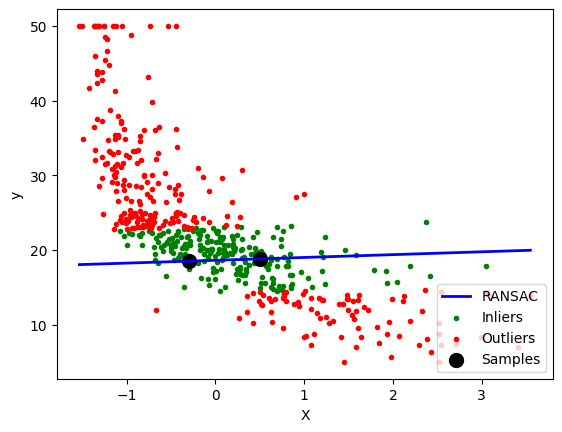

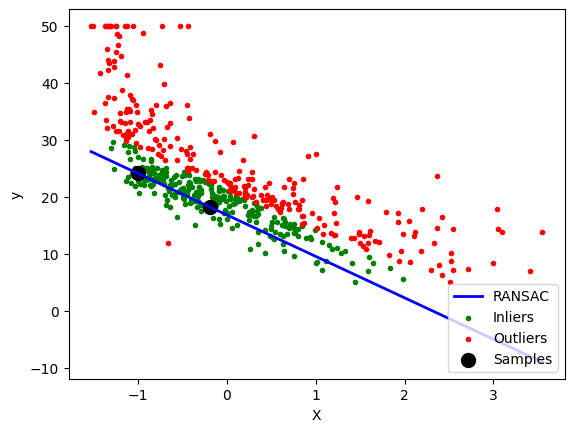

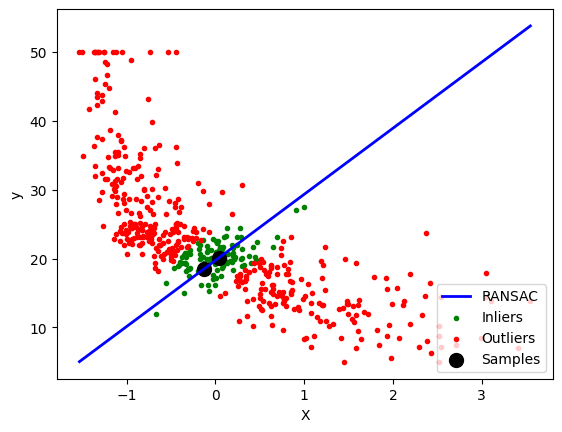

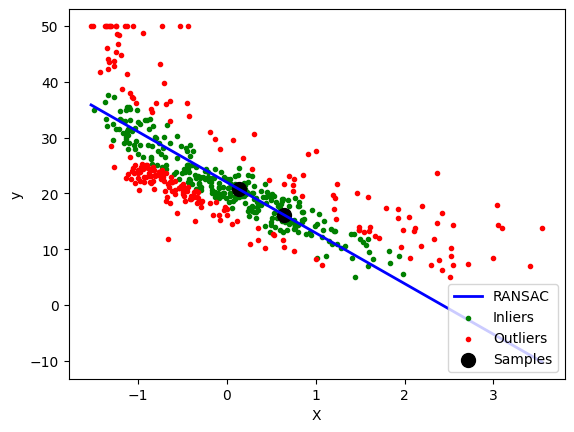

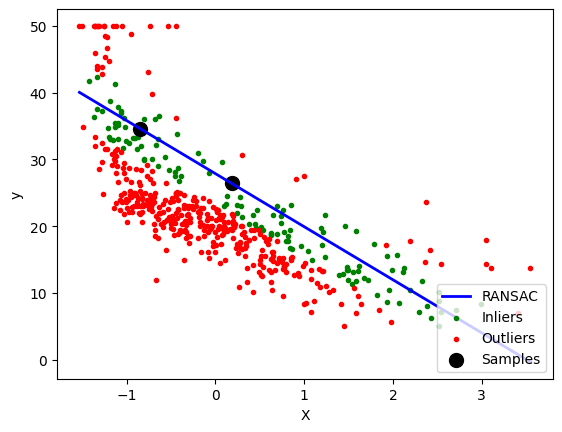

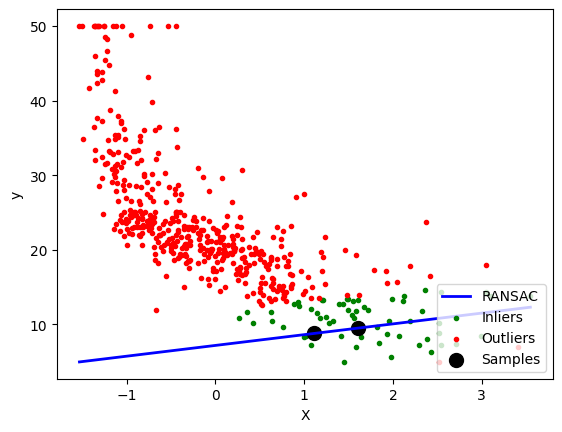

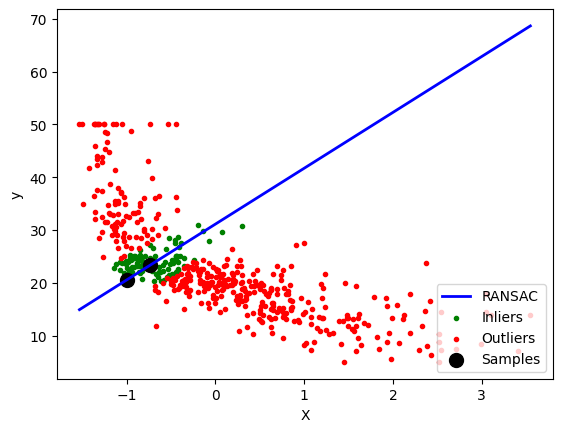

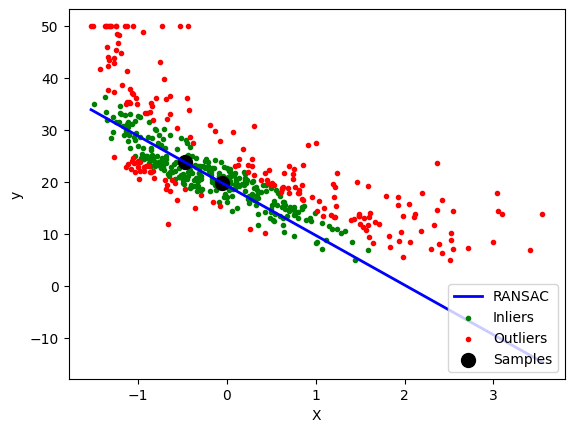

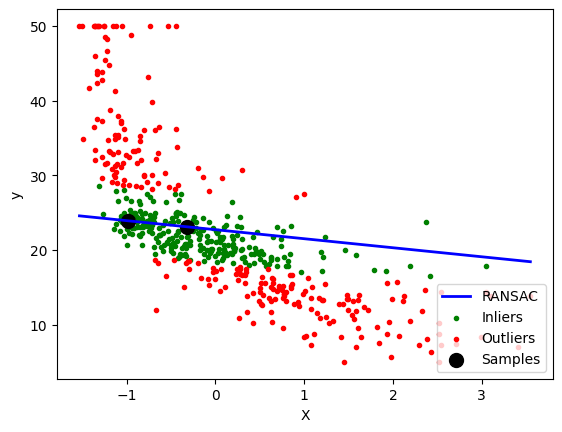

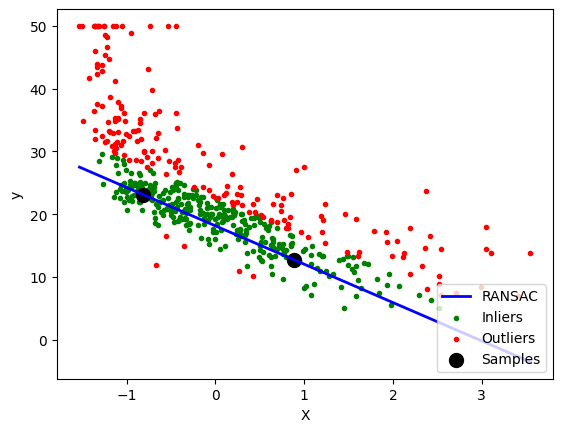

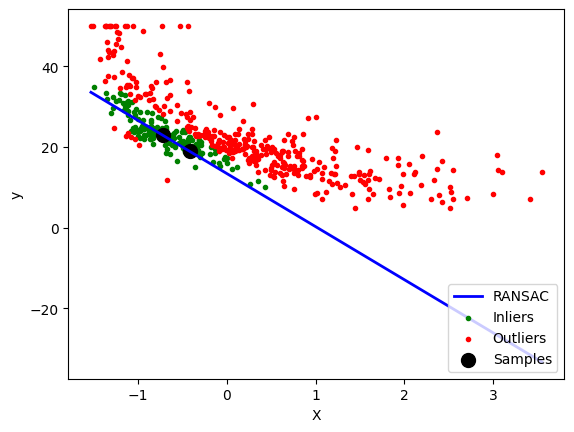

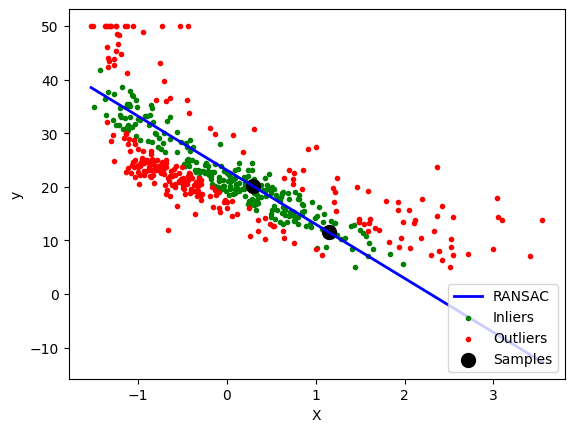

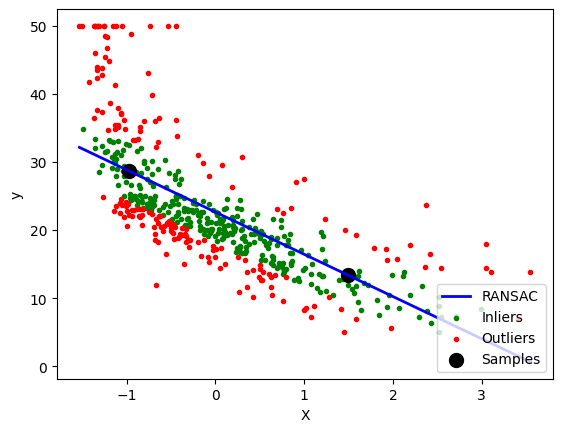

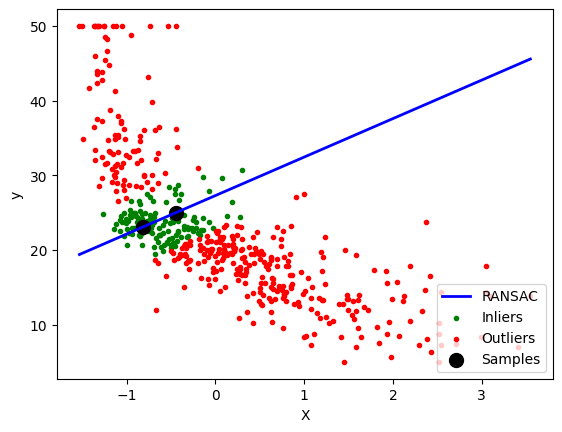

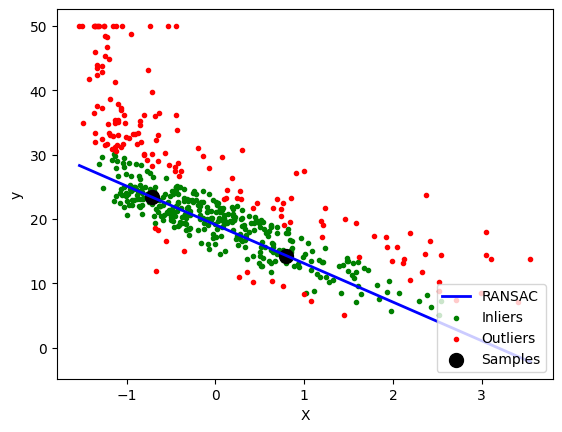

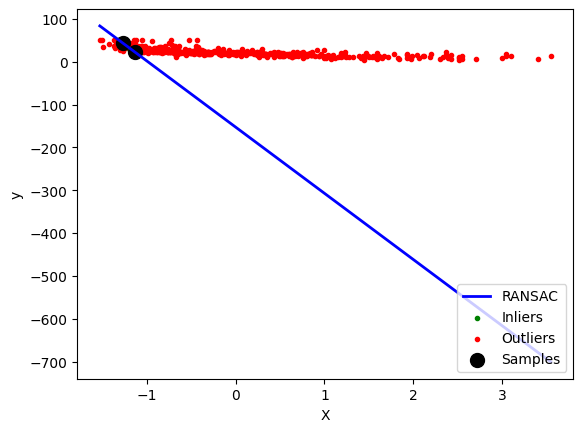

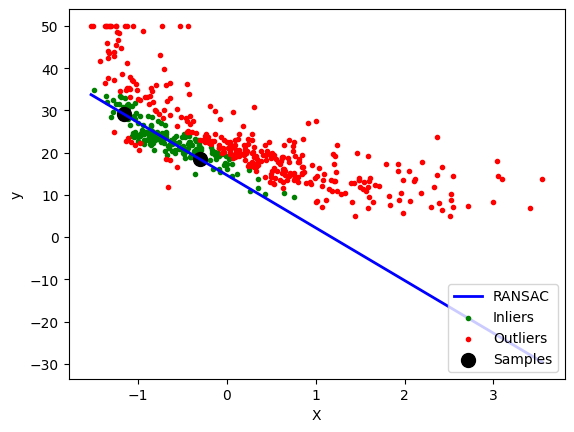

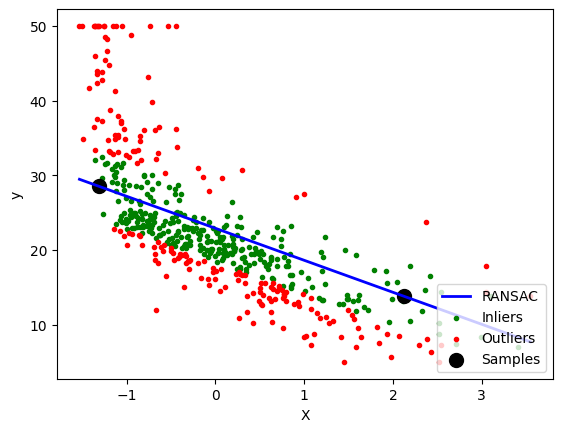

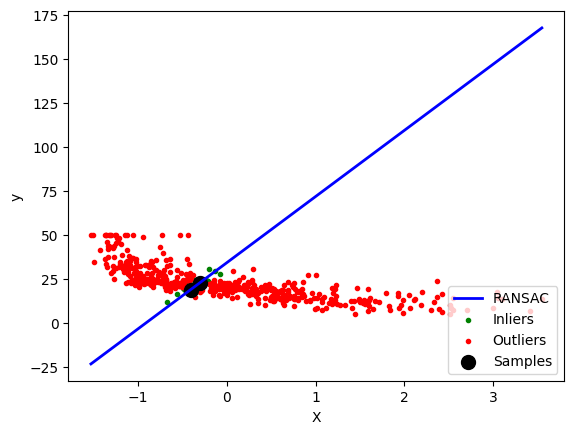

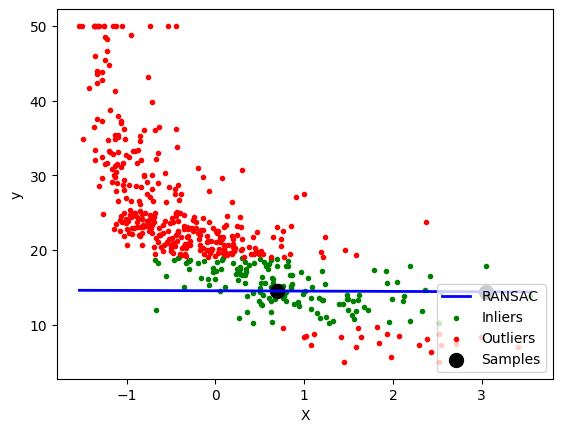

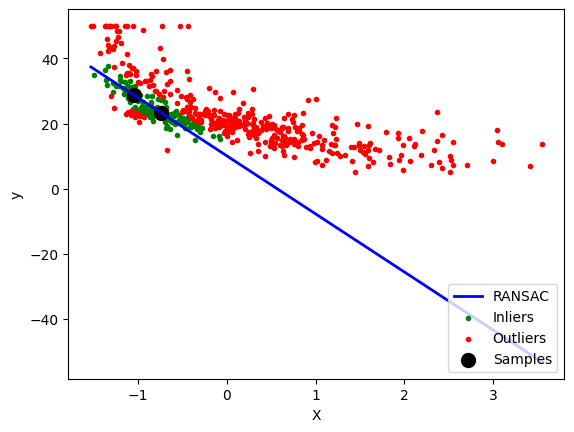

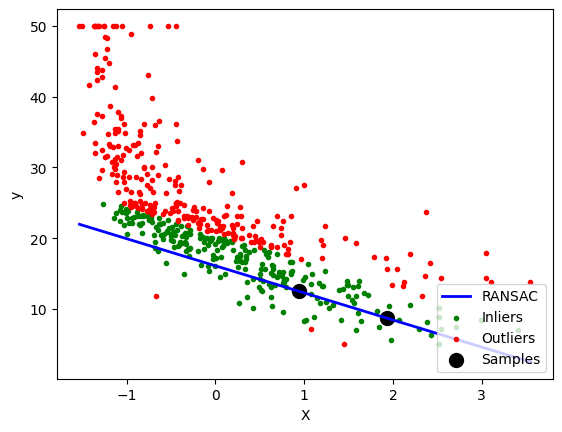

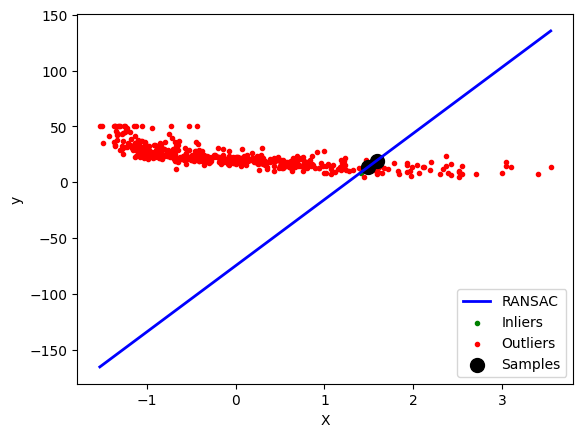

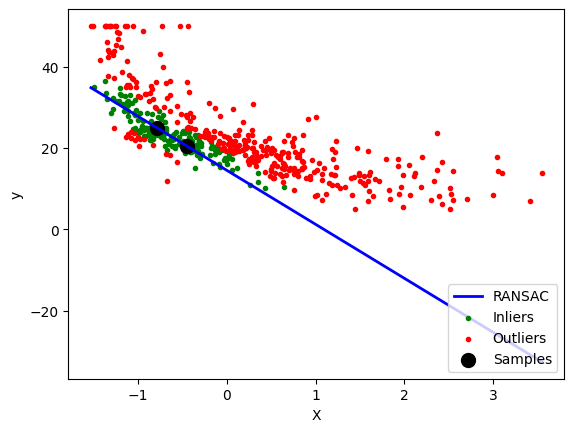

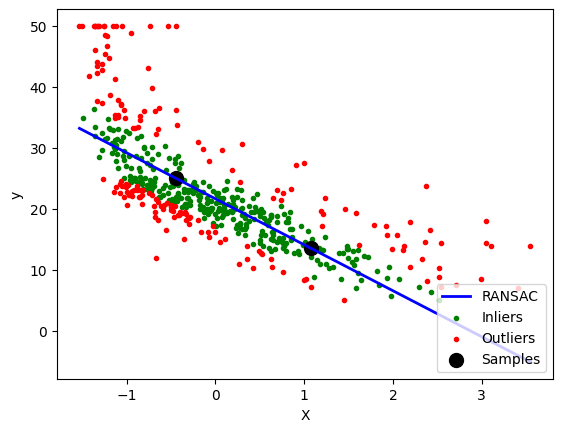

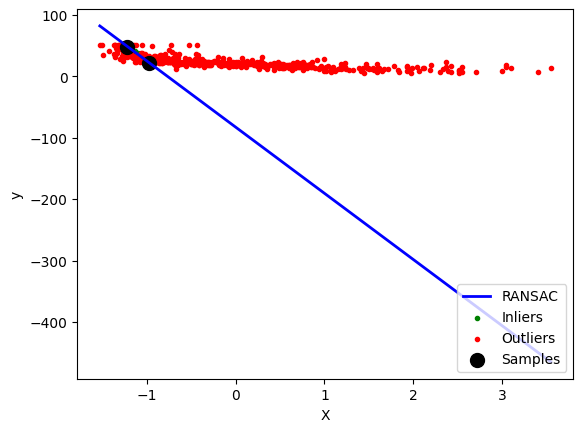

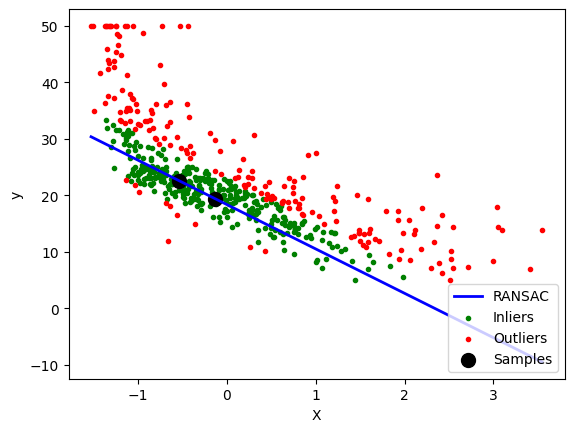

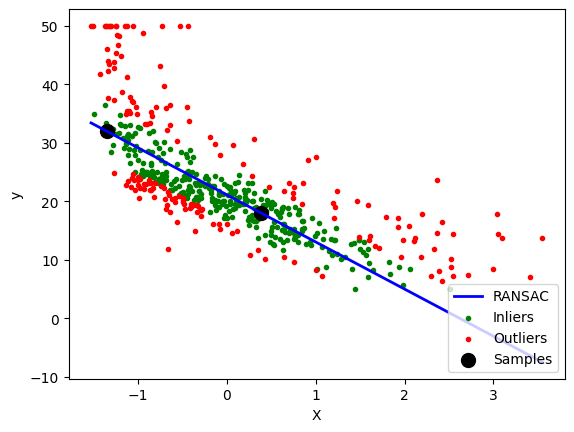

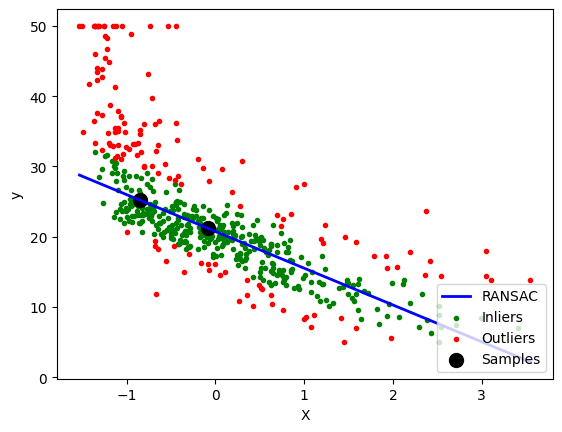

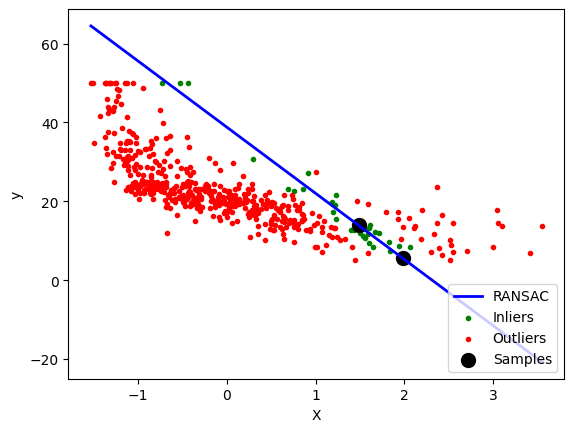

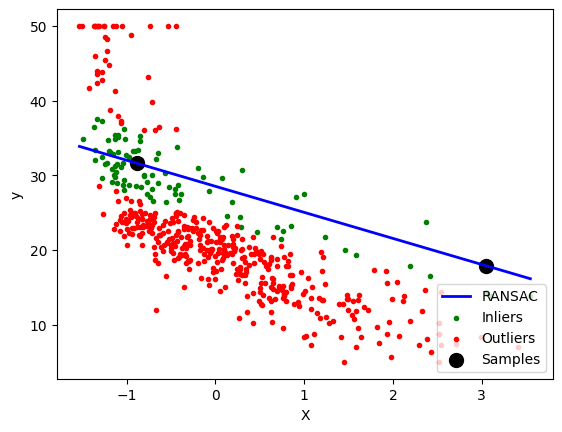

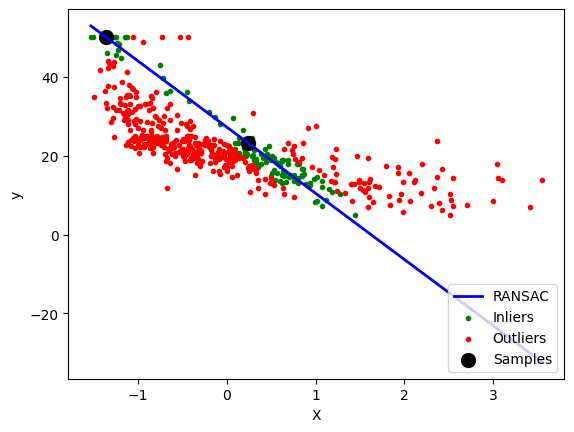

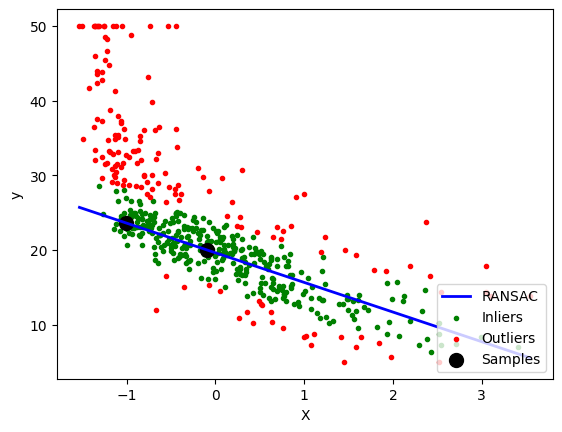

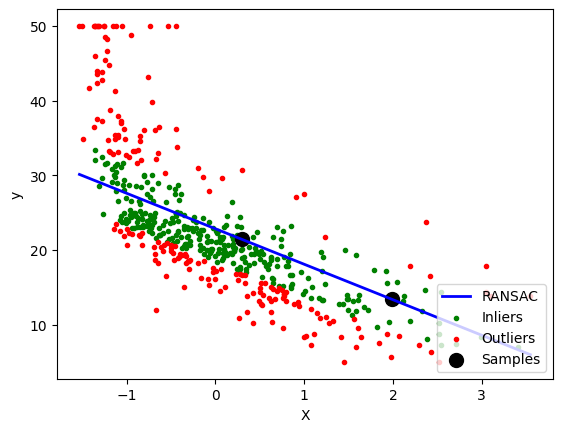

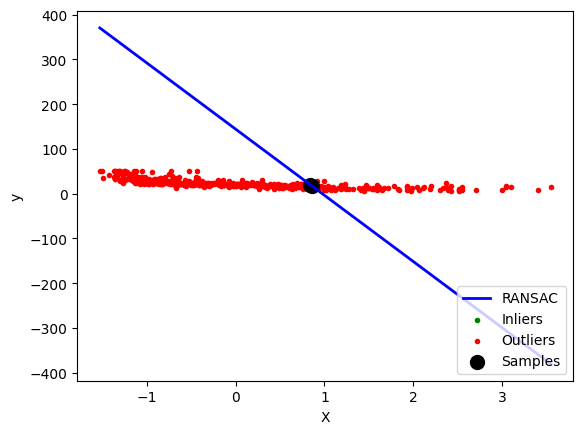

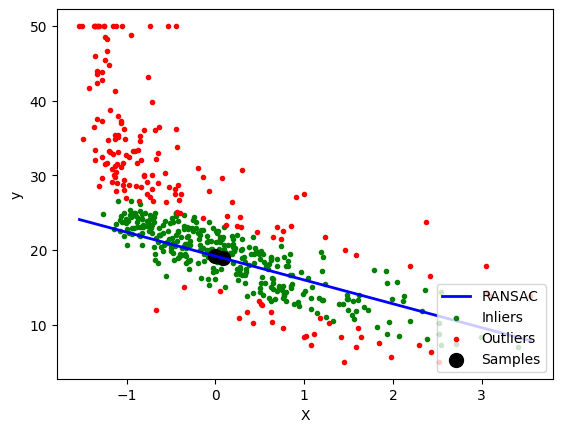

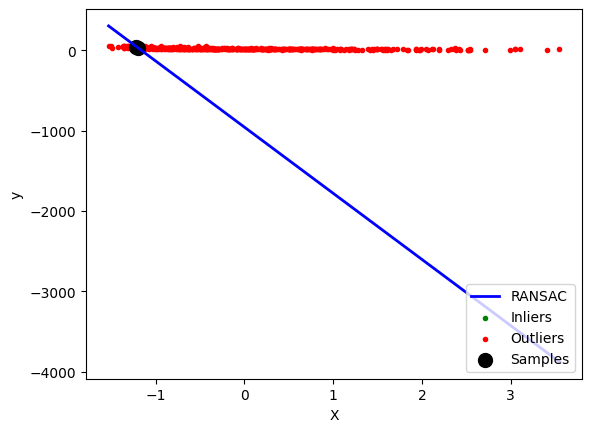

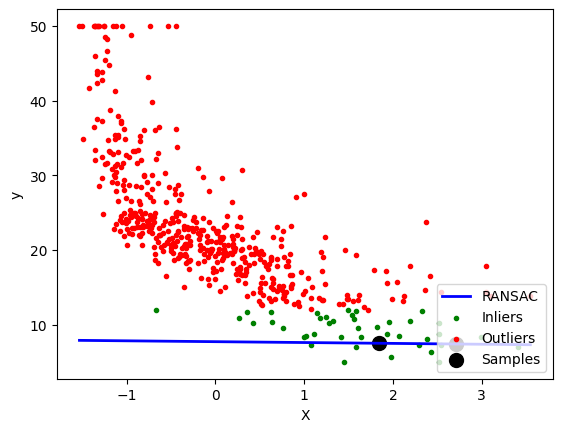

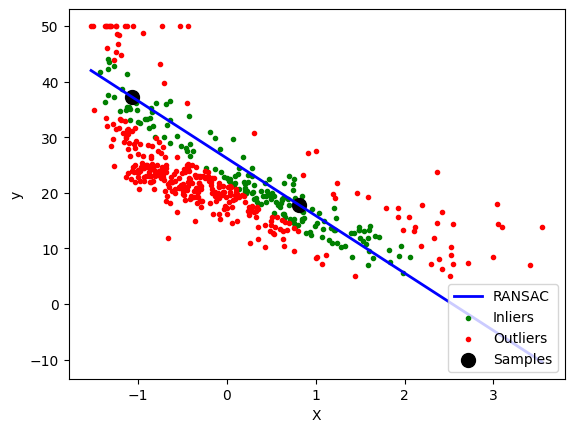

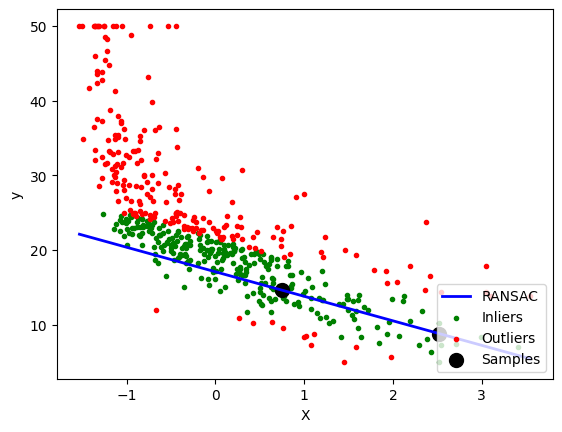

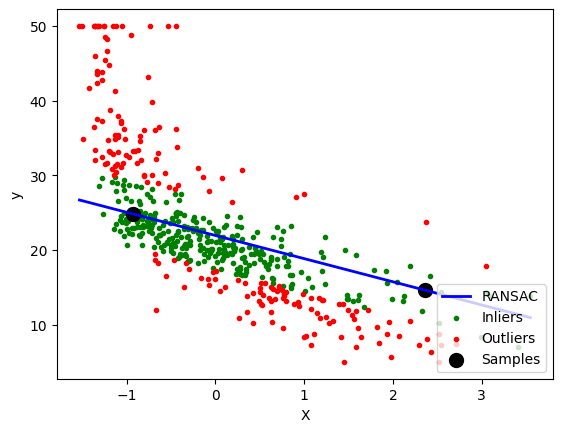

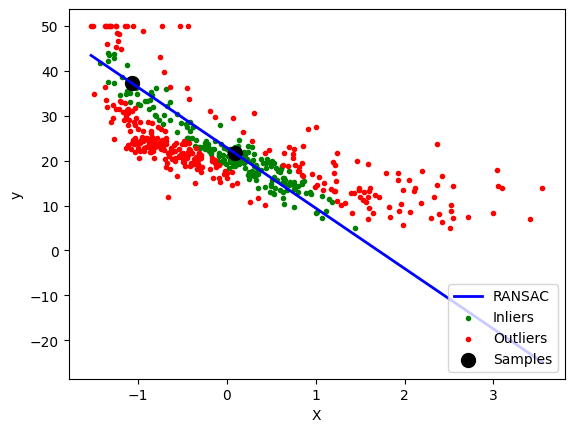

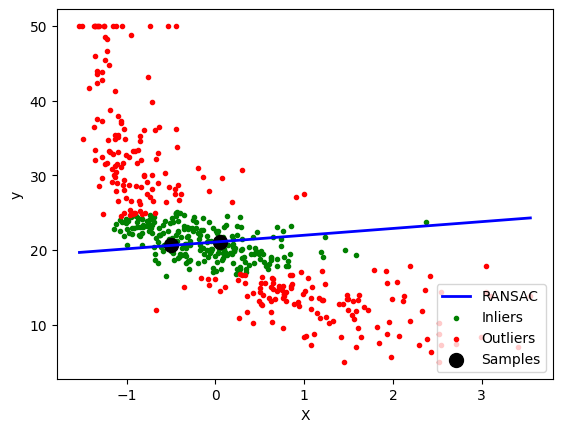

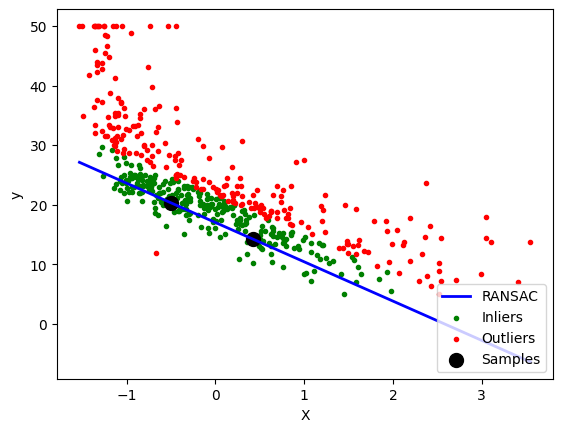

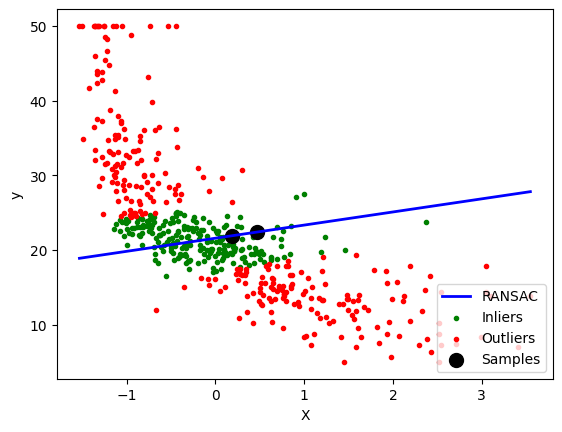

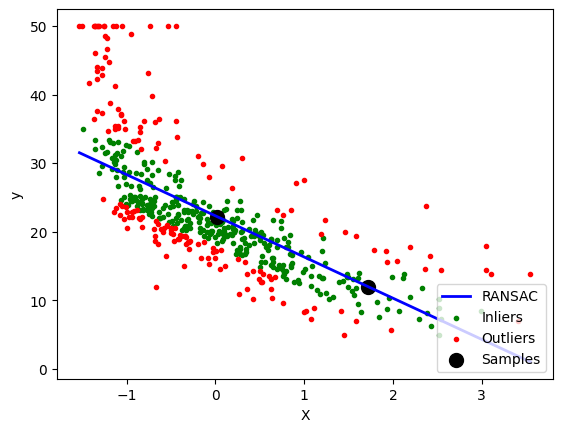

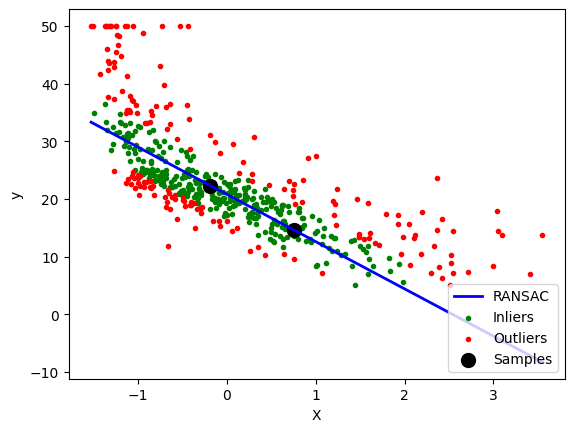

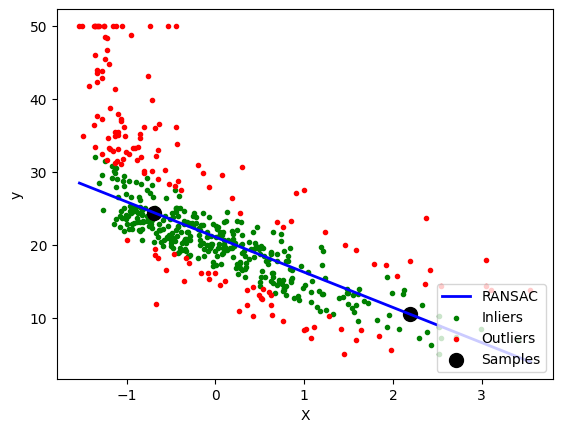

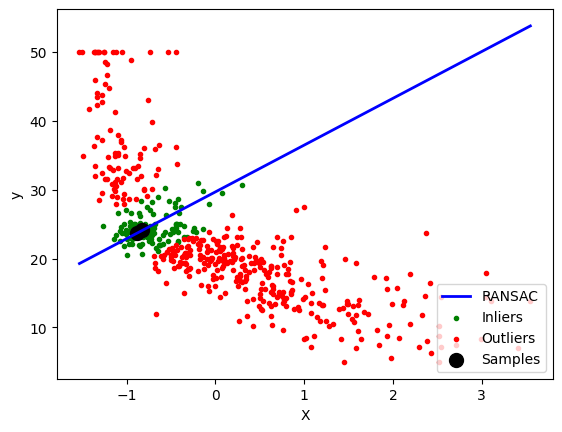

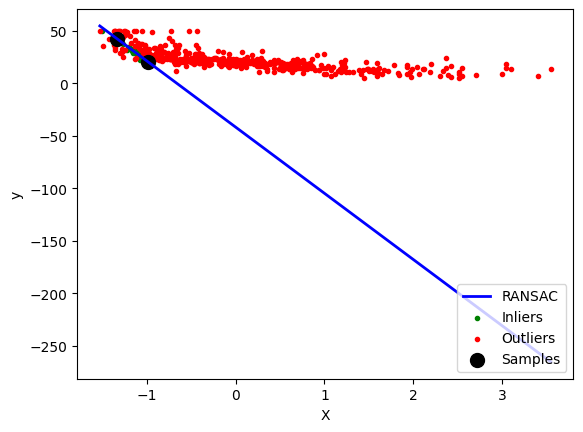

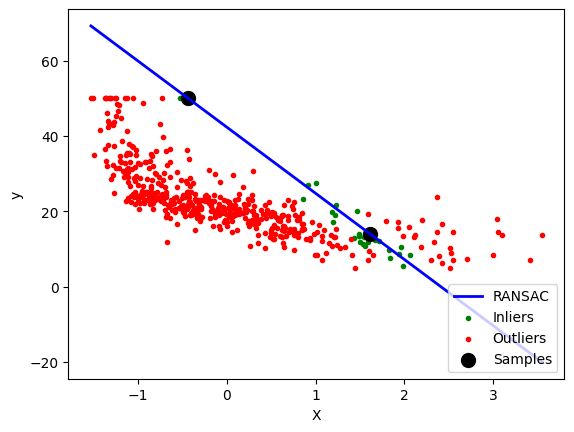

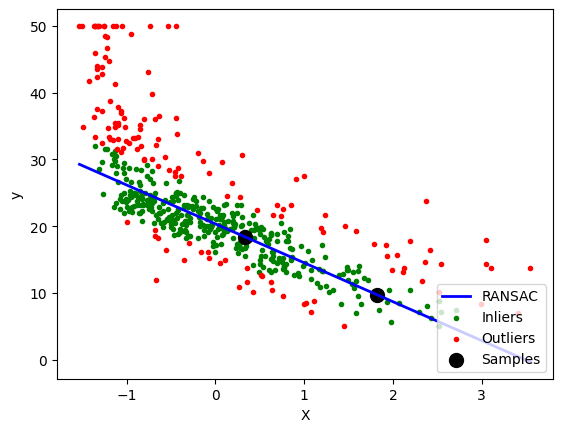

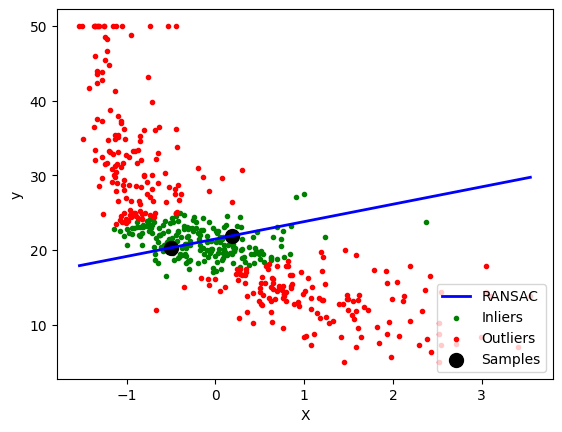

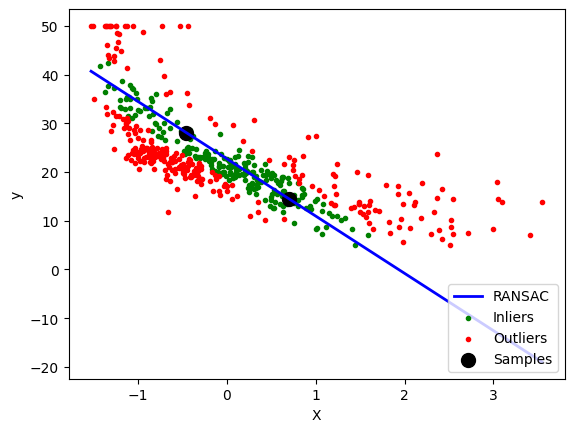

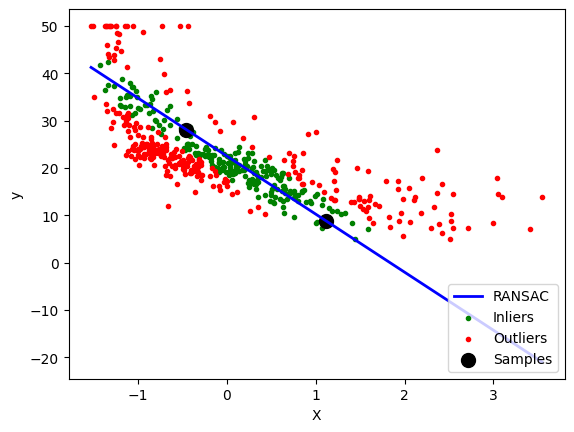

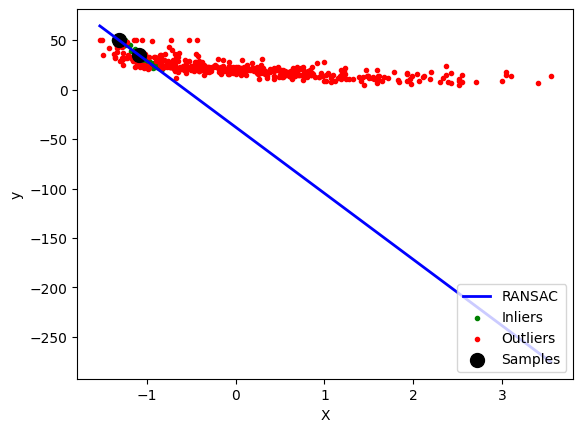

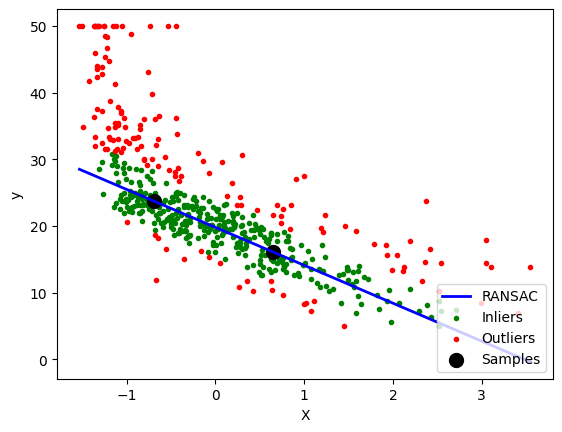

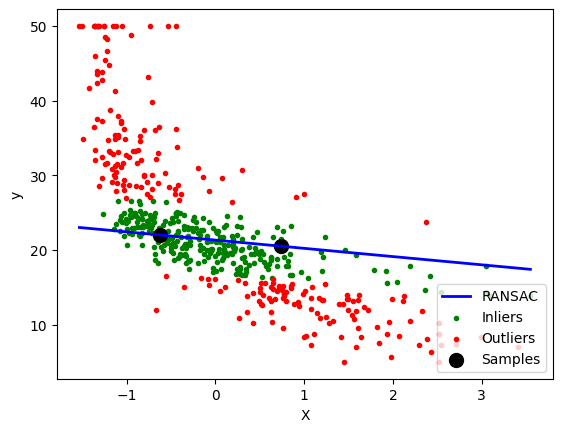

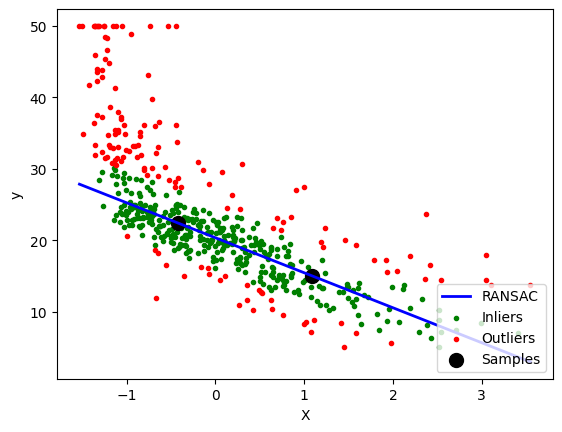

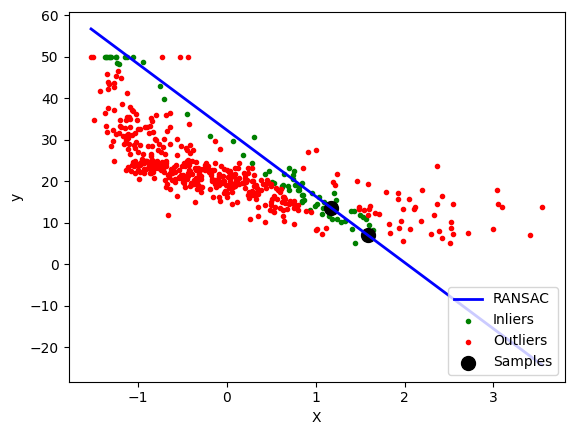

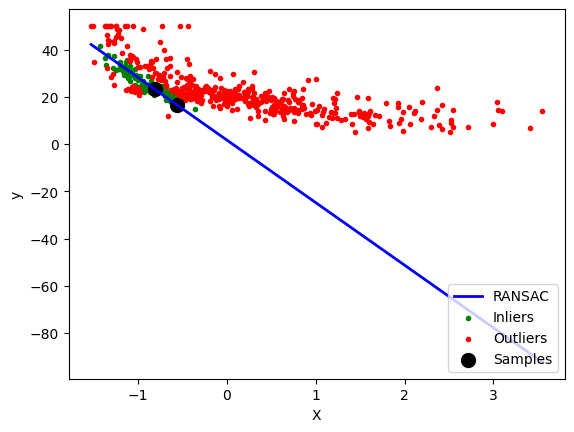

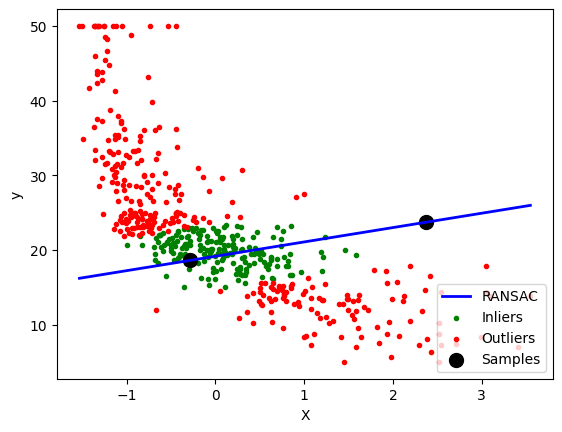

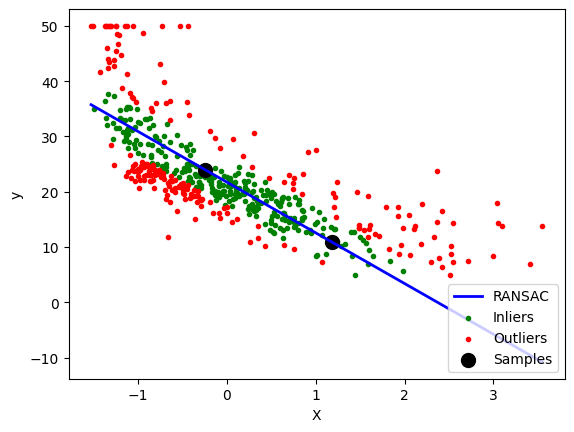

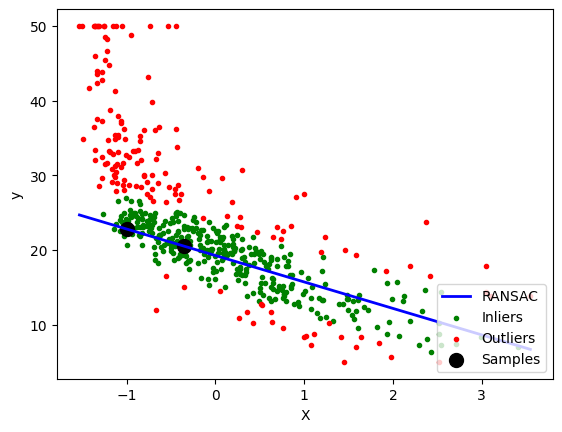

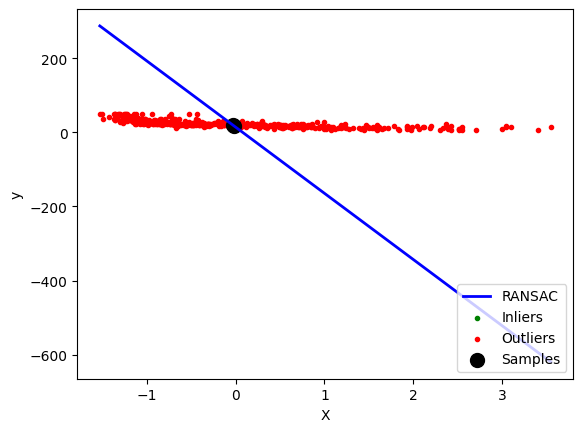

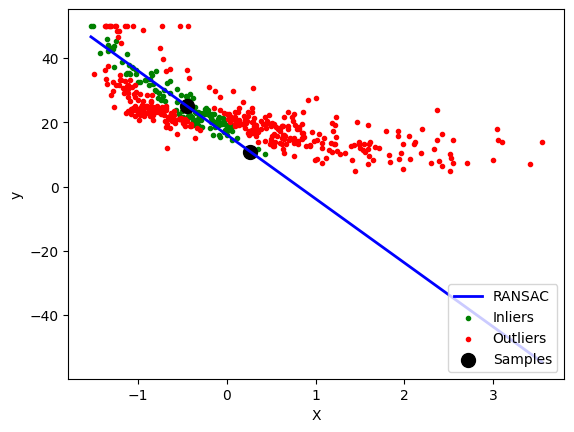

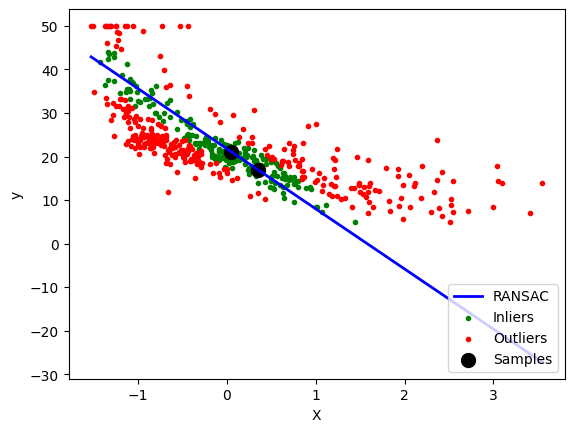

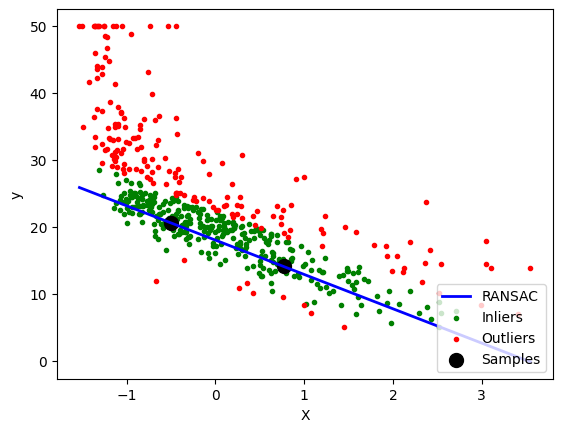

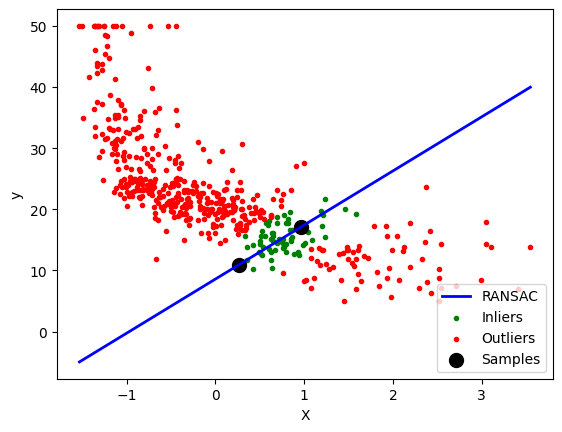

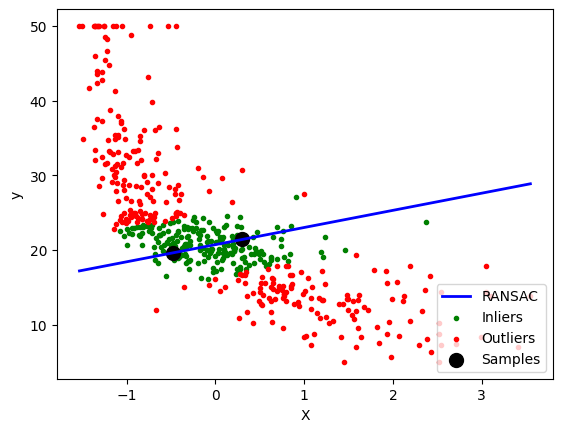

In [17]:
ransac = RANSAC1(100, 20, 100)
ransac.fit(X, y)

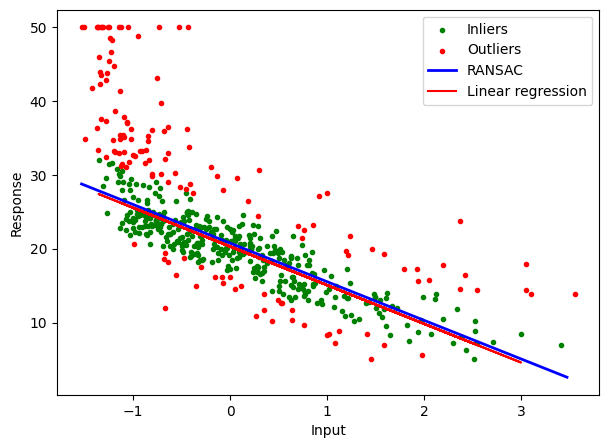

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X[ransac.mask], 
                                                    y[ransac.mask], 
                                                    test_size=0.3)
 
lr = LinearRegression()
lr.fit(X_train, y_train)                
y_pred = lr.predict(X_test)                
 
 
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = ransac.best_model[0] * line_X + ransac.best_model[1]
 
plt.figure(figsize=(7,5))
plt.scatter(X[ransac.mask], y[ransac.mask], color='green', 
            marker='.', label='Inliers')
plt.scatter(X[~ransac.mask], y[~ransac.mask], color='red', 
            marker='.', label='Outliers')
plt.plot(line_X, line_y, color='blue', linewidth=2, label='RANSAC')
plt.plot(X_test, y_pred, color='red', label='Linear regression')
 
plt.legend(loc='upper right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()         